In [58]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [17]:
with open('../../data/trades.pickle', 'rb') as f:
    trades = pickle.load(f)

In [18]:
trades

,Symbol,entry_date,entry_price,exit_date,exit_price,return,Close,plus_di,minus_di,adx,...,30_days_high,macd,macd_signal,macd_hist,result,holding_days,Industry,kmeans_cluster,hmm_cluster,Industry_woe
0,ABB,2016-04-01,1130.375488,2016-05-04,1072.873291,-5.087000,1130.375488,30.314262,7.871093,30.230831,...,1.015792,0.036581,0.026990,0.009592,0,33,Capital Goods,2.0,1.0,0.092264
1,ABB,2017-04-11,1267.503418,2017-05-23,1273.588867,0.480113,1267.503418,38.091147,6.465750,32.571018,...,1.007805,0.036242,0.021145,0.015097,1,42,Capital Goods,2.0,0.0,0.092264
2,ABB,2018-01-15,1330.367676,2018-02-19,1306.259766,-1.812124,1330.367676,31.127918,9.259722,30.107032,...,1.006734,0.014370,0.008634,0.005736,0,35,Capital Goods,2.0,0.0,0.092264
3,ABB,2018-09-06,1142.333374,2018-10-03,1253.569824,9.737652,1142.333374,25.509846,15.018909,31.457567,...,1.053241,0.018352,0.019640,-0.001288,1,27,Capital Goods,2.0,0.0,0.092264
4,ABB,2019-04-10,1217.739868,2019-05-09,1225.911133,0.671019,1217.739868,28.033595,10.191537,31.081143,...,1.027107,0.020635,0.015897,0.004738,1,29,Capital Goods,2.0,0.0,0.092264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,ZYDUSLIFE,2023-04-18,504.088043,2023-05-02,505.113983,0.203524,504.088043,28.030868,7.307240,31.986264,...,1.005040,0.019131,0.016010,0.003121,1,14,Healthcare,0.0,2.0,-0.119259
3665,ZYDUSLIFE,2023-06-21,547.276001,2023-08-28,625.555908,14.303552,547.276001,34.441499,12.898958,30.845364,...,1.008391,0.021036,0.012053,0.008983,1,68,Healthcare,0.0,2.0,-0.119259
3666,ZYDUSLIFE,2023-08-29,623.238342,2023-08-30,619.441406,-0.609227,623.238342,15.770438,14.935649,38.176930,...,1.058232,0.011479,0.019841,-0.008362,0,1,Healthcare,0.0,2.0,-0.119259
3667,ZYDUSLIFE,2023-11-09,604.007141,2024-04-12,948.886414,57.098541,604.007141,31.486758,11.840640,30.410006,...,1.035186,-0.000721,-0.010215,0.009494,1,155,Healthcare,0.0,2.0,-0.119259


In [19]:
trades.columns

Index(['Symbol', 'entry_date', 'entry_price', 'exit_date', 'exit_price',
       'return', 'Close', 'plus_di', 'minus_di', 'adx', 'rsi', 'roc_3',
       'roc_7', 'roc_14', 'roc_30', 'atr_3', 'atr_7', 'atr_14', 'atr_30',
       'return_1d', 'return_3d', 'return_7d', 'return_14d', 'return_30d',
       'vol_3d', 'vol_7d', 'vol_14d', 'vol_30d', 'ema_9_ratio', 'ema_30_ratio',
       'ema_100_ratio', '3_days_high', '7_days_high', '14_days_high',
       '30_days_high', 'macd', 'macd_signal', 'macd_hist', 'result',
       'holding_days', 'Industry', 'kmeans_cluster', 'hmm_cluster',
       'Industry_woe'],
      dtype='object')

In [20]:
to_drop = ["Symbol", "entry_price", "exit_date","exit_price","Close","holding_days","return" ,"Industry"]

In [21]:
df= trades.drop(columns=to_drop)

In [22]:
df

,entry_date,plus_di,minus_di,adx,rsi,roc_3,roc_7,roc_14,roc_30,atr_3,...,7_days_high,14_days_high,30_days_high,macd,macd_signal,macd_hist,result,kmeans_cluster,hmm_cluster,Industry_woe
0,2016-04-01,30.314262,7.871093,30.230831,72.168547,7.104766,9.965195,12.496742,18.141607,0.039857,...,1.015792,1.015792,1.015792,0.036581,0.026990,0.009592,0,2.0,1.0,0.092264
1,2017-04-11,38.091147,6.465750,32.571018,82.200720,11.083821,14.605768,20.974362,21.151521,0.044896,...,1.007805,1.007805,1.007805,0.036242,0.021145,0.015097,1,2.0,0.0,0.092264
2,2018-01-15,31.127918,9.259722,30.107032,73.463215,7.022742,5.686184,8.716386,8.416819,0.035823,...,1.006734,1.006734,1.006734,0.014370,0.008634,0.005736,0,2.0,0.0,0.092264
3,2018-09-06,25.509846,15.018909,31.457567,58.838333,-0.731477,-0.860589,8.153230,10.935169,0.030623,...,1.053241,1.053241,1.053241,0.018352,0.019640,-0.001288,1,2.0,0.0,0.092264
4,2019-04-10,28.033595,10.191537,31.081143,66.221570,0.290384,4.837640,4.694628,10.674529,0.028165,...,1.027107,1.027107,1.027107,0.020635,0.015897,0.004738,1,2.0,0.0,0.092264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,2023-04-18,28.030868,7.307240,31.986264,78.395095,2.239407,4.623817,6.966629,10.755702,0.022508,...,1.005040,1.005040,1.005040,0.019131,0.016010,0.003121,1,0.0,2.0,-0.119259
3665,2023-06-21,34.441499,12.898958,30.845364,75.080694,1.642327,9.823529,9.096223,6.563938,0.019220,...,1.008391,1.008391,1.008391,0.021036,0.012053,0.008983,1,0.0,2.0,-0.119259
3666,2023-08-29,15.770438,14.935649,38.176930,49.694317,-1.388776,-2.454268,-3.570607,5.769394,0.020973,...,1.045731,1.058232,1.058232,0.011479,0.019841,-0.008362,0,0.0,2.0,-0.119259
3667,2023-11-09,31.486758,11.840640,30.410006,59.558146,4.719162,6.782313,3.769902,2.407823,0.032241,...,1.035186,1.035186,1.035186,-0.000721,-0.010215,0.009494,1,0.0,2.0,-0.119259


In [23]:
# df["month"] = df["entry_date"].dt.month
# df["day"] = df["entry_date"].dt.day
df = df.drop(columns=["entry_date"])

In [24]:
df

,plus_di,minus_di,adx,rsi,roc_3,roc_7,roc_14,roc_30,atr_3,atr_7,...,7_days_high,14_days_high,30_days_high,macd,macd_signal,macd_hist,result,kmeans_cluster,hmm_cluster,Industry_woe
0,30.314262,7.871093,30.230831,72.168547,7.104766,9.965195,12.496742,18.141607,0.039857,0.037105,...,1.015792,1.015792,1.015792,0.036581,0.026990,0.009592,0,2.0,1.0,0.092264
1,38.091147,6.465750,32.571018,82.200720,11.083821,14.605768,20.974362,21.151521,0.044896,0.035600,...,1.007805,1.007805,1.007805,0.036242,0.021145,0.015097,1,2.0,0.0,0.092264
2,31.127918,9.259722,30.107032,73.463215,7.022742,5.686184,8.716386,8.416819,0.035823,0.028486,...,1.006734,1.006734,1.006734,0.014370,0.008634,0.005736,0,2.0,0.0,0.092264
3,25.509846,15.018909,31.457567,58.838333,-0.731477,-0.860589,8.153230,10.935169,0.030623,0.029738,...,1.053241,1.053241,1.053241,0.018352,0.019640,-0.001288,1,2.0,0.0,0.092264
4,28.033595,10.191537,31.081143,66.221570,0.290384,4.837640,4.694628,10.674529,0.028165,0.024947,...,1.027107,1.027107,1.027107,0.020635,0.015897,0.004738,1,2.0,0.0,0.092264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,28.030868,7.307240,31.986264,78.395095,2.239407,4.623817,6.966629,10.755702,0.022508,0.019130,...,1.005040,1.005040,1.005040,0.019131,0.016010,0.003121,1,0.0,2.0,-0.119259
3665,34.441499,12.898958,30.845364,75.080694,1.642327,9.823529,9.096223,6.563938,0.019220,0.019879,...,1.008391,1.008391,1.008391,0.021036,0.012053,0.008983,1,0.0,2.0,-0.119259
3666,15.770438,14.935649,38.176930,49.694317,-1.388776,-2.454268,-3.570607,5.769394,0.020973,0.022846,...,1.045731,1.058232,1.058232,0.011479,0.019841,-0.008362,0,0.0,2.0,-0.119259
3667,31.486758,11.840640,30.410006,59.558146,4.719162,6.782313,3.769902,2.407823,0.032241,0.025127,...,1.035186,1.035186,1.035186,-0.000721,-0.010215,0.009494,1,0.0,2.0,-0.119259


In [25]:
# df["result"] = df["result"].map({"profit":1, "loss":0})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 0 to 3668
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   plus_di         3669 non-null   float64
 1   minus_di        3669 non-null   float64
 2   adx             3669 non-null   float64
 3   rsi             3669 non-null   float64
 4   roc_3           3669 non-null   float64
 5   roc_7           3669 non-null   float64
 6   roc_14          3669 non-null   float64
 7   roc_30          3669 non-null   float64
 8   atr_3           3669 non-null   float64
 9   atr_7           3669 non-null   float64
 10  atr_14          3669 non-null   float64
 11  atr_30          3669 non-null   float64
 12  return_1d       3669 non-null   float32
 13  return_3d       3669 non-null   float32
 14  return_7d       3669 non-null   float32
 15  return_14d      3669 non-null   float32
 16  return_30d      3669 non-null   float32
 17  vol_3d          3669 non-null   f

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["result"]), df["result"], test_size=0.2, random_state=42, stratify=df["result"])

In [28]:
X_train

,plus_di,minus_di,adx,rsi,roc_3,roc_7,roc_14,roc_30,atr_3,atr_7,...,3_days_high,7_days_high,14_days_high,30_days_high,macd,macd_signal,macd_hist,kmeans_cluster,hmm_cluster,Industry_woe
1151,29.782649,7.753123,31.524976,71.197883,3.592484,5.575739,3.791735,11.727298,0.026737,0.026207,...,1.023163,1.023163,1.023163,1.023163,0.021822,0.017162,0.004660,2.0,0.0,0.041870
3185,29.072080,10.371217,30.103893,70.152275,-0.929847,6.116411,6.116411,18.915443,0.024635,0.023912,...,1.014904,1.015987,1.015987,1.015987,0.032328,0.029172,0.003157,2.0,0.0,-0.113656
454,28.763565,9.746672,30.514615,71.451011,3.505300,5.967546,5.859615,4.761827,0.027381,0.023443,...,1.009965,1.009965,1.009965,1.009967,0.014415,0.010820,0.003595,0.0,2.0,-0.029508
1699,26.150324,9.027712,30.913567,65.783641,-0.303317,3.659622,4.730877,12.414487,0.019176,0.018767,...,1.009566,1.009566,1.009566,1.009566,0.018586,0.014532,0.004053,2.0,1.0,-0.029508
2835,26.572241,19.522681,30.571488,55.355528,-1.813342,-1.318806,3.268281,9.155599,0.014951,0.013988,...,1.026749,1.028778,1.028778,1.028778,0.014413,0.014806,-0.000393,0.0,2.0,0.041870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,33.663667,10.843380,31.501593,73.367351,0.346820,2.399274,11.929822,20.284241,0.014838,0.018260,...,1.006832,1.006832,1.006832,1.006832,0.030367,0.025847,0.004520,0.0,2.0,0.101833
1016,34.467379,13.140515,30.702300,71.624738,0.695628,3.291344,13.306549,17.284684,0.021132,0.023680,...,1.016617,1.016617,1.016617,1.016617,0.041383,0.036022,0.005361,0.0,3.0,-0.306214
1180,21.076450,16.616876,33.557236,52.389861,1.257852,-2.719037,-2.127665,1.898730,0.038547,0.033029,...,1.015528,1.031056,1.034162,1.080745,0.003658,0.011772,-0.008114,2.0,0.0,-0.240706
2937,20.105714,18.276127,37.363411,54.607955,-1.916823,-1.903798,0.881518,7.328512,0.040554,0.031808,...,1.026554,1.039255,1.047180,1.047180,0.015837,0.023713,-0.007876,2.0,0.0,-0.029508


In [29]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [30]:
# calculate class weights
class_weights = y_train.value_counts(normalize=True)
class_weights = {cls: 1/weight for cls, weight in class_weights.items()}
class_weights

{0: 1.6935949221004039, 1: 2.4417637271214643}

In [31]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((2935, 34), (734, 34), (2935,), (734,))

In [ ]:
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    print(f"Class weight: {c}")
    lg = LogisticRegression(class_weight=class_weights, C=c, max_iter=1000, random_state=42, n_jobs=-1)
    lg.fit(X_train_scaled, y_train)
    predictions = lg.predict(X_test_scaled)
    print(classification_report(y_test, predictions))

Class weight: 0.001
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       433
           1       0.47      0.54      0.50       301

    accuracy                           0.56       734
   macro avg       0.56      0.56      0.55       734
weighted avg       0.57      0.56      0.56       734

Class weight: 0.01
              precision    recall  f1-score   support

           0       0.66      0.58      0.61       433
           1       0.48      0.56      0.52       301

    accuracy                           0.57       734
   macro avg       0.57      0.57      0.57       734
weighted avg       0.58      0.57      0.57       734

Class weight: 0.1
              precision    recall  f1-score   support

           0       0.64      0.59      0.61       433
           1       0.47      0.53      0.50       301

    accuracy                           0.57       734
   macro avg       0.56      0.56      0.56       734
weighted avg     

In [33]:
predictions = lg.predict(X_test_scaled)

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.59      0.62       433
           1       0.47      0.53      0.50       301

    accuracy                           0.57       734
   macro avg       0.56      0.56      0.56       734
weighted avg       0.57      0.57      0.57       734



<Axes: title={'center': 'Feature Importance'}>

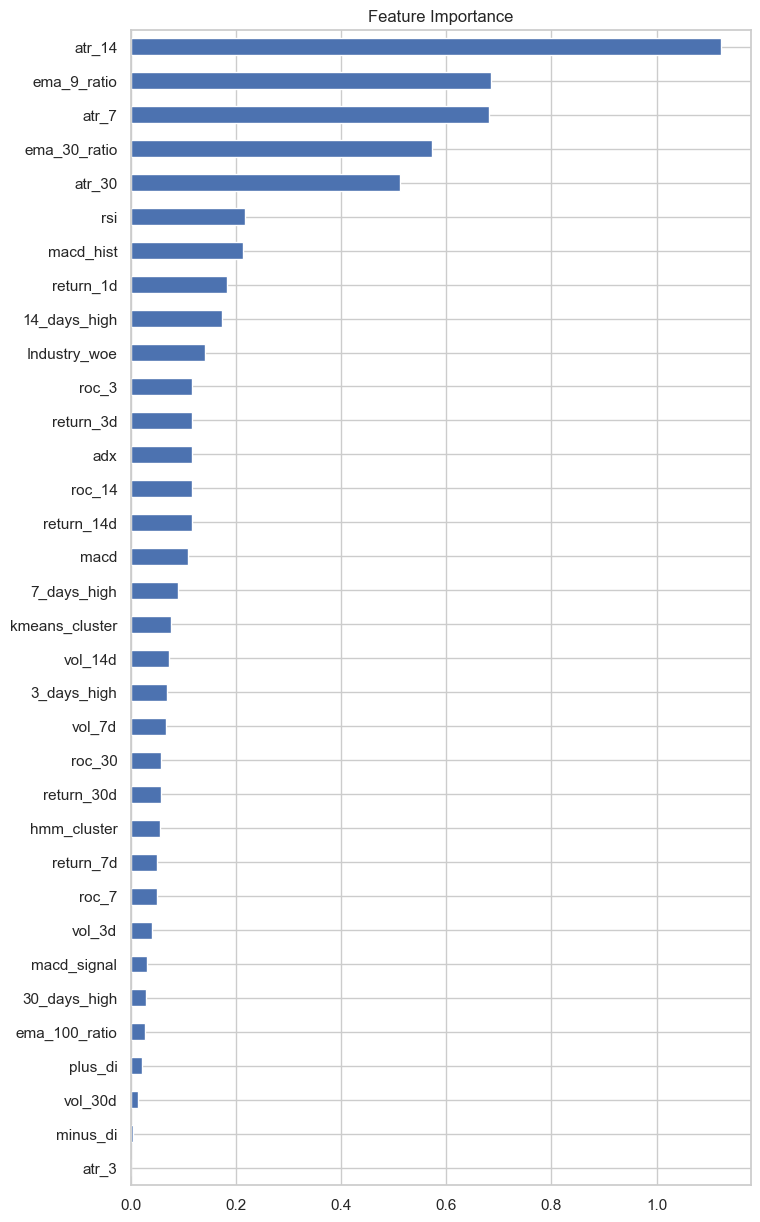

In [44]:
# plot feature importance
plt.figure(figsize=(8,15))
importance = pd.Series(lg.coef_[0], index=X_train.columns)
# make values absolute
importance = importance.abs()
importance = importance.sort_values()
importance.plot(kind='barh', title='Feature Importance')

In [36]:
rf = RandomForestClassifier(class_weight=class_weights, n_estimators=400, random_state=42, n_jobs=-1, max_depth=5)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test, predictions_rf))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       433
           1       0.46      0.44      0.45       301

    accuracy                           0.56       734
   macro avg       0.54      0.54      0.54       734
weighted avg       0.56      0.56      0.56       734



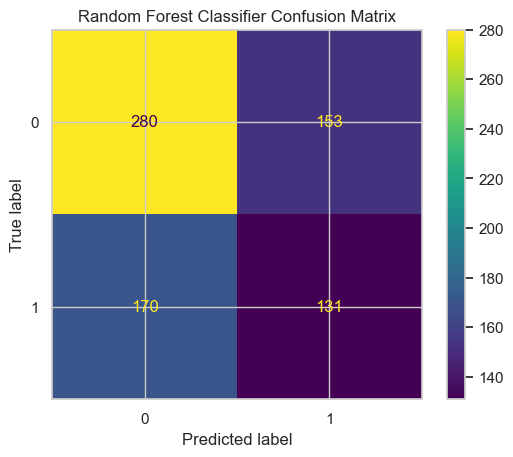

In [47]:
# confusion matrix
cm = confusion_matrix(y_test, predictions_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

In [38]:
# Get prediction probabilities
y_proba = rf.predict_proba(X_test)[:, 1]  # probability of profit (class 1)

# Try different thresholds
thresholds = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print(classification_report(y_test, y_pred_thresh))
    
    # Calculate profit recall specifically
    profit_recall = recall_score(y_test, y_pred_thresh, pos_label=1)
    print(f"Profit Recall: {profit_recall:.3f}")


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       433
           1       0.41      1.00      0.58       301

    accuracy                           0.41       734
   macro avg       0.21      0.50      0.29       734
weighted avg       0.17      0.41      0.24       734

Profit Recall: 1.000

Threshold: 0.35
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       433
           1       0.41      1.00      0.58       301

    accuracy                           0.41       734
   macro avg       0.20      0.50      0.29       734
weighted avg       0.17      0.41      0.24       734

Profit Recall: 0.997

Threshold: 0.4
              precision    recall  f1-score   support

           0       0.67      0.01      0.02       433
           1       0.41      0.99      0.58       301

    accuracy                           0.41       734
   macro avg       0.54      0.50    

/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


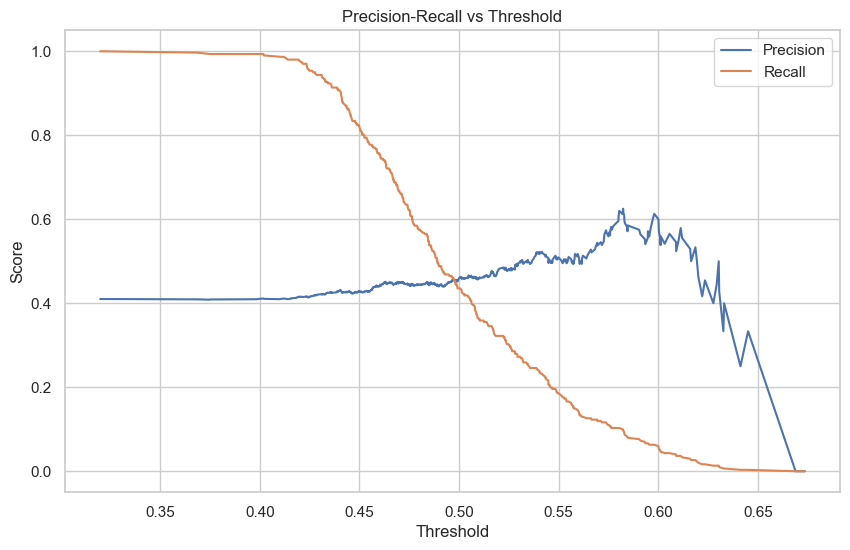

In [39]:
from sklearn.metrics import precision_recall_curve

# Plot precision-recall curve to find optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall') 
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()

In [40]:
lgb = LGBMClassifier(class_weight=class_weights, n_estimators=400, random_state=42, n_jobs=-1, max_depth=5)
lgb.fit(X_train, y_train)
predictions_lgb = lgb.predict(X_test)
print("LightGBM Classifier")
print(classification_report(y_test, predictions_lgb))

[LightGBM] [Info] Number of positive: 1202, number of negative: 1733
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7934
[LightGBM] [Info] Number of data points in the train set: 2935, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

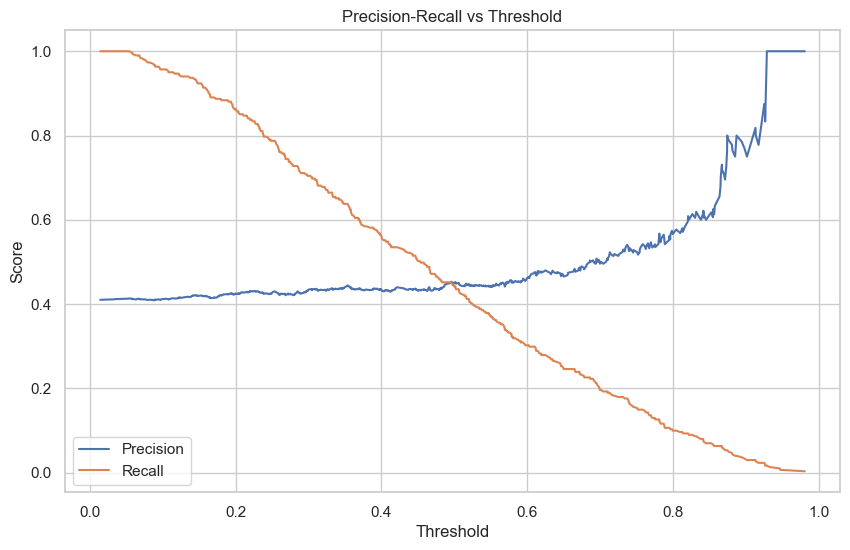

In [41]:
y_proba = lgb.predict_proba(X_test)[:, 1]  # probability of profit (class 1)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall') 
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()

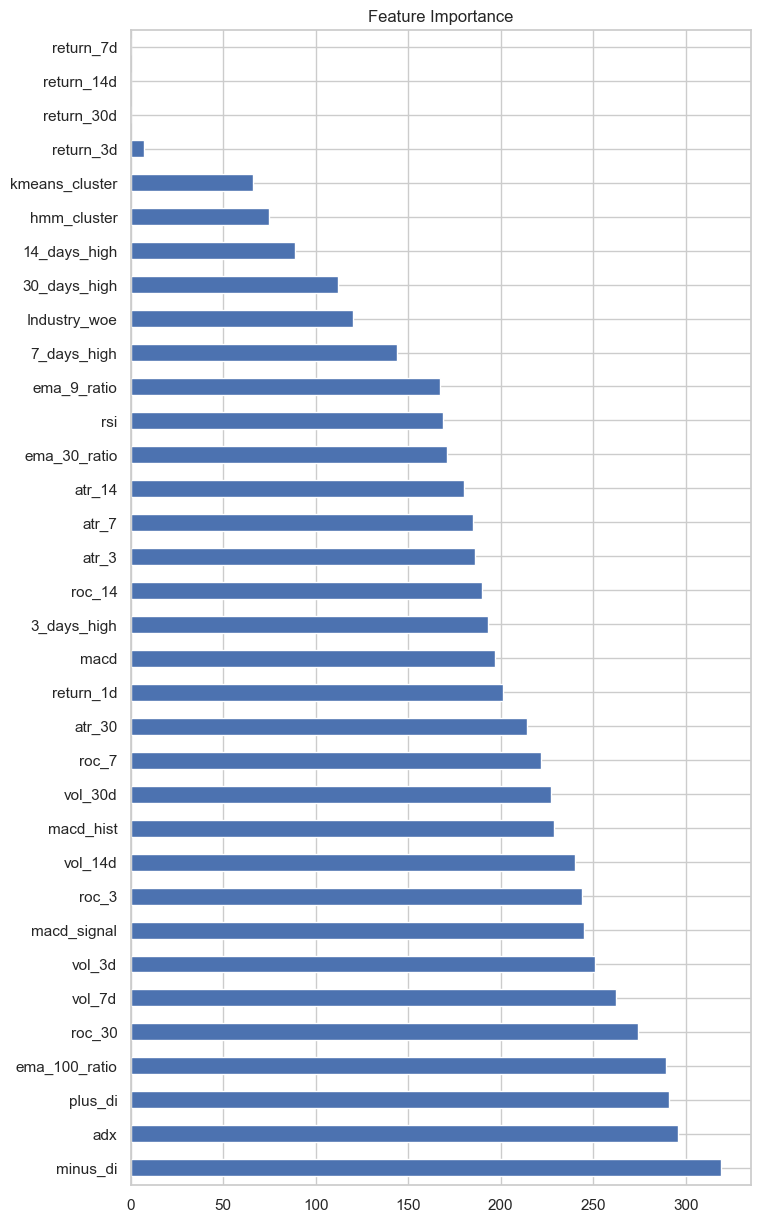

In [42]:
# plot feature importance
plt.figure(figsize=(8,15))
importance = pd.Series(lgb.feature_importances_, index=X_train.columns)
importance = importance.sort_values(ascending=False)
importance.plot(kind='barh', title='Feature Importance')
plt.show()

In [61]:
xgb = XGBClassifier(scale_pos_weight=class_weights[0]/class_weights[1], n_estimators=400, random_state=42, n_jobs=-1, max_depth=5)
xgb.fit(X_train, y_train)
predictions_xgb = xgb.predict(X_test)
print("XGBoost Classifier")
print(classification_report(y_test, predictions_xgb))

XGBoost Classifier
              precision    recall  f1-score   support

           0       0.62      0.72      0.66       433
           1       0.47      0.36      0.41       301

    accuracy                           0.57       734
   macro avg       0.54      0.54      0.54       734
weighted avg       0.56      0.57      0.56       734



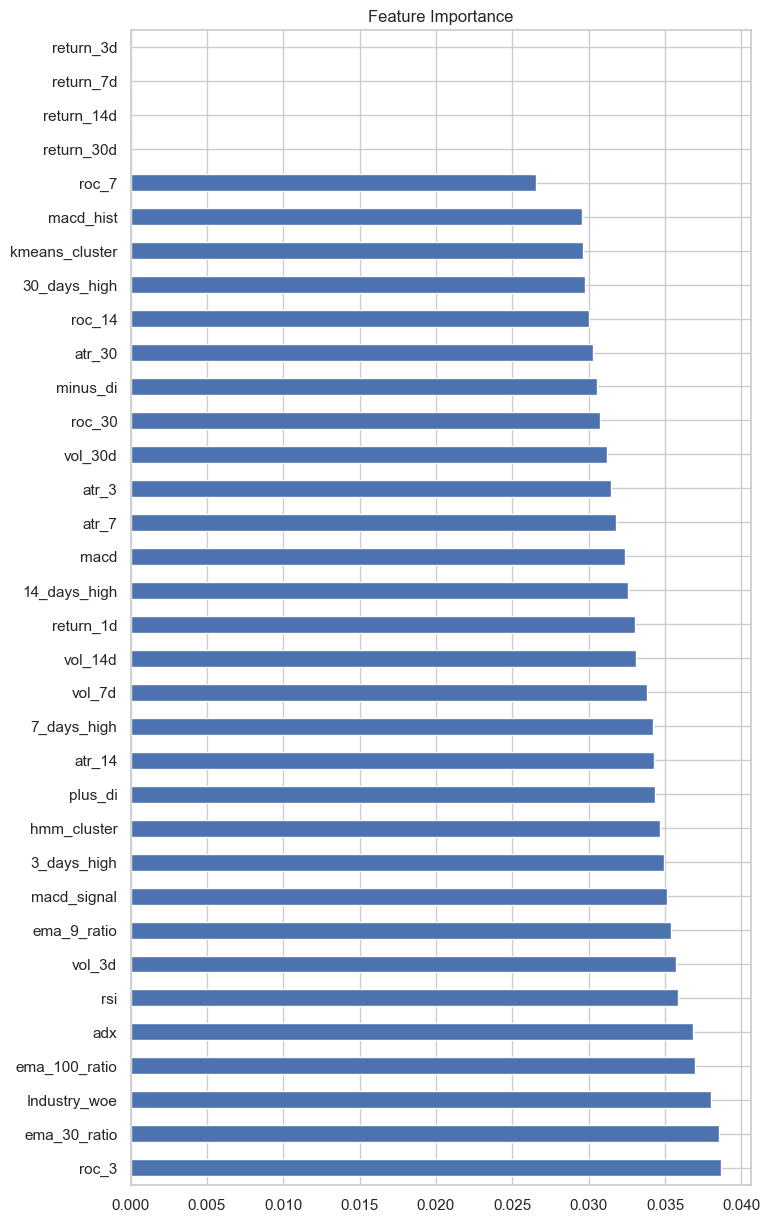

In [62]:
# plot feature importance
plt.figure(figsize=(8,15))
importance = pd.Series(xgb.feature_importances_, index=X_train.columns)
importance = importance.sort_values(ascending=False)
importance.plot(kind='barh', title='Feature Importance')
plt.show()